In [2]:
import pandas as pd
from pandas import read_csv
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
import warnings
# Ignore UserWarning
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
# Load the dataset
filename = 'Drug_dataset.csv'
data = read_csv(filename)

In [4]:
data.dtypes

Drug        object
Disease     object
Age          int64
Gender      object
Weight      object
Severity     int64
dtype: object

In [5]:
# Replace categorical values with numerical values
data.replace({'Gender': {'Female': 0, 'Male': 1}}, inplace=True)
data.replace({'Weight': {'Low': 0, 'Medium': 1, 'High': 2}}, inplace=True)

In [6]:
# Replace diseases with numerical values
data.replace({'Disease': {'Acne': 0, 'Allergy': 1, 'Diabetes': 2, 'Fungal infection': 3,
                          'Urinary tract infection': 4, 'Malaria': 5, 'Migraine': 6, 'Hepatitis B': 7,
                          'AIDS': 8}}, inplace=True)


In [7]:
# Prepare feature matrix (X) and target variable (y)
df_x = data[['Disease', 'Gender', 'Age', 'Weight', 'Severity']]
df_y = data[['Drug']]

In [8]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0)

In [9]:
x_train.head()

,Disease,Gender,Age,Weight,Severity
1732,1,0,80,2,0
202,1,1,11,1,3
10,2,0,82,2,0
311,3,1,74,2,0
568,5,1,36,2,2


In [10]:
y_train.head()

,Drug
1732,Levozet M 10/5mg Tablet 10'S
202,DIO 1 Tablet 10'S
10,Glizeal 2mg/500mg Tablet 10'SGlizeal 1mg/500mg...
311,Zocon C Cream 15gm
568,Larinate 100 Kit Tablet 5'SLarinate 200 Kit Ta...


In [11]:
# Train RandomForestClassifier
rf = RandomForestClassifier()
rf = rf.fit(df_x, np.ravel(df_y))

In [12]:
# Evaluate RandomForestClassifier
y_pred = rf.predict(x_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))

Random Forest Accuracy: 0.719047619047619


In [13]:
# dumping the model in Disk 
import joblib as joblib 
joblib.dump(rf,'model/medical_rf.pkl')

['model/medical_rf.pkl']

In [14]:
#loading the model 
clf=joblib.load('model/medical_rf.pkl')

In [15]:
#making Prediction of test dataset 
prediction=rf.predict(x_test) 
print(prediction[0:10])

['Tinaderm Solution 20ml'
 "Algrot 120mg Tablet 10'SAlgrot 30mg Suspension 60ml"
 'LEE Neem Face Wash 70gm'
 "Macprox DP 500mg Tablet 10'SMacprox DP 250mg Tablet 10'S"
 "Tenepla Tablet 10'S"
 "Tetilin 20mg Capsule 10'STetilin 10mg Capsule 10'S"
 'Falcither 150mg Injection 2ml'
 "Glimitab MV 1mg Tablet 10'SGlimitab MV 2mg Tablet 10'S"
 'Lumate AT Injection' 'Quadri Meningo Injection 0.5ml']


In [16]:
# making prediction for patient with malaria ,age 24 and gender of male  
#Malaria=5,male=1,Age=36,weight=2,Severity=2
test=[5,1,36,2,2]  
test=np.array(test) #list in numpy array  
print(test.shape)
test=np.array(test).reshape(1,-1) 
print(test.shape)

(5,)
(1, 5)


In [17]:
prediction=clf.predict(test) 
print(prediction[0])

Larinate 100 Kit Tablet 5'SLarinate 200 Kit Tablet 6'SLarinate 60mg Injection 5mlLarinate 50mg Kit 1'SLarinate 120mg Injection 15mlLarinate 50mg Tablet 6'SLarinate Kit 15'S


In [18]:
# Train Gaussian Naive Bayes
gnb = GaussianNB()
gnb = gnb.fit(df_x, np.ravel(df_y))

In [19]:
# Evaluate Gaussian Naive Bayes
y_pred = gnb.predict(x_test)
print("Gaussian Naive Bayes Accuracy:", accuracy_score(y_test, y_pred))

Gaussian Naive Bayes Accuracy: 0.7119047619047619


In [20]:
#making recommendatiob of Drug name 
result=gnb.predict(test) 
print(result[0])

Larinate 100 Kit Tablet 5'SLarinate 200 Kit Tablet 6'SLarinate 60mg Injection 5mlLarinate 50mg Kit 1'SLarinate 120mg Injection 15mlLarinate 50mg Tablet 6'SLarinate Kit 15'S


In [21]:
#Dump the model in Disk 
joblib.dump(gnb,'model/medical_nb.pkl')

['model/medical_nb.pkl']

In [22]:
# Making predictions with a sample test case
test = [5, 1, 24, 1, 3]  # Adding severity value
test = np.array(test).reshape(1, -1)

In [23]:
prediction_rf = rf.predict(test) 
print("Random Forest Prediction:", prediction_rf[0])

Random Forest Prediction: Resochin Tablet 10'S


In [24]:
prediction_gnb = gnb.predict(test) 
print("Gaussian Naive Bayes Prediction:", prediction_gnb[0])

Gaussian Naive Bayes Prediction: Resochin Tablet 10'S


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


In [26]:
from sklearn.tree import DecisionTreeClassifier
# Train DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(df_x, np.ravel(df_y))

DecisionTreeClassifier()

In [27]:

# Evaluate DecisionTreeClassifier
y_pred_dt = dt.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

Decision Tree Accuracy: 0.7119047619047619


In [28]:
#making recommendation for drug
result=dt.predict(test) 
print(result[0])

Resochin Tablet 10'S


In [29]:
#Dump the model in Disk 
joblib.dump(dt,'model/medical_dt.pkl')

['model/medical_dt.pkl']

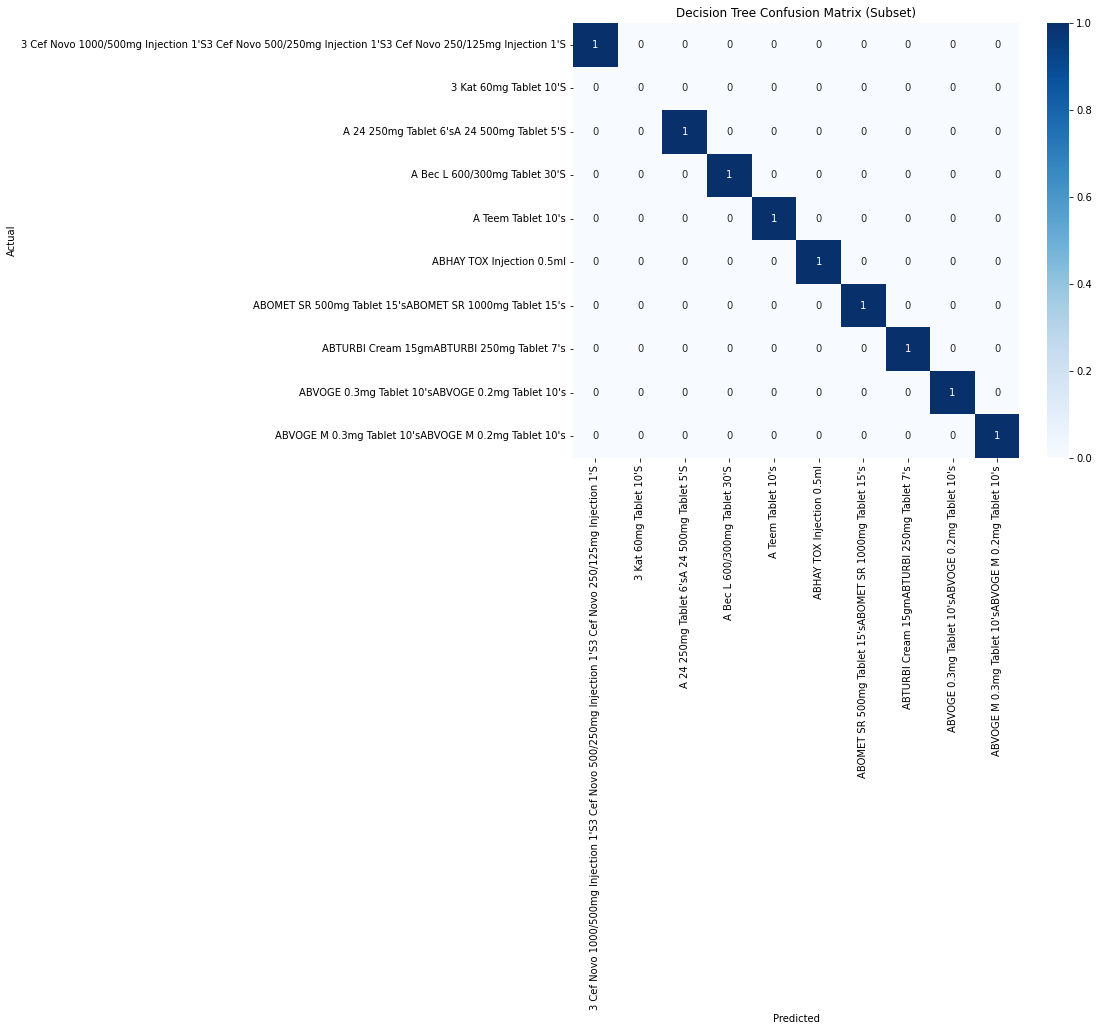

In [30]:
# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Selecting a subset of 10 rows and columns
subset_size = 10
subset_labels = np.unique(df_y)[:subset_size]

plt.figure(figsize=(10, 8))
sns.heatmap(cm_dt[:subset_size, :subset_size], annot=True, fmt='d', cmap='Blues', xticklabels=subset_labels, yticklabels=subset_labels)
plt.title('Decision Tree Confusion Matrix (Subset)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
